In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.client import device_lib
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# print(device_lib.list_local_devices())
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

X = np.load('Mask_features_v2.npy')
y = np.load('Mask_labels_v2.npy')

# normalize data, I think this means to make all the values in the tensor between 0-1
# since its an image the highest pixel value can only be 255 hence why we divide it
X = X/255.0

model = Sequential()
# 1st type of layer (64 units or 64 neurons)
# 2nd kernel size (window size)
# 3rd shape of image. In x it is represented as (X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)) we use [1:] so skip the -1 and take everything after which is the 50X50 grey
model.add(Conv2D(100,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# final layer takes in flatten image
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation("relu"))

# output layer
# softmax probability distribution 
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# from sklearn.model_selection import train_test_split
# train_data,test_data,train_target,test_target=train_test_split(X, y,test_size=0.1)

# how much data we passing in at once
history = model.fit(X, y, batch_size = 35, epochs=20, validation_split = 0.2)

Epoch 1/20
32/32 [==============================] - 4s 113ms/step - loss: 1.5185 - accuracy: 0.5591 - val_loss: 0.6315 - val_accuracy: 0.6703
Epoch 2/20
32/32 [==============================] - 3s 94ms/step - loss: 0.5501 - accuracy: 0.7182 - val_loss: 0.4729 - val_accuracy: 0.8007
Epoch 3/20
32/32 [==============================] - 3s 93ms/step - loss: 0.3916 - accuracy: 0.8291 - val_loss: 0.3338 - val_accuracy: 0.8659
Epoch 4/20
32/32 [==============================] - 3s 93ms/step - loss: 0.2814 - accuracy: 0.8791 - val_loss: 0.2089 - val_accuracy: 0.9384
Epoch 5/20
32/32 [==============================] - 3s 93ms/step - loss: 0.2281 - accuracy: 0.9155 - val_loss: 0.1937 - val_accuracy: 0.9384
Epoch 6/20
32/32 [==============================] - 3s 93ms/step - loss: 0.1519 - accuracy: 0.9455 - val_loss: 0.2561 - val_accuracy: 0.8986
Epoch 7/20
32/32 [==============================] - 3s 94ms/step - loss: 0.1392 - accuracy: 0.9500 - val_loss: 0.1465 - val_accuracy: 0.9457
Epoch 8/20
3

In [2]:
# saving model
model.save('mask_detection_model_v8')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mask_detection_model_v8\assets


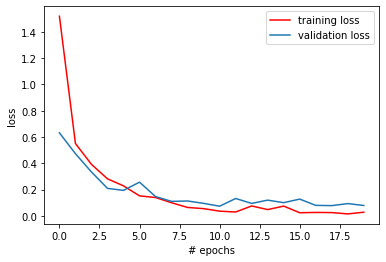

In [4]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

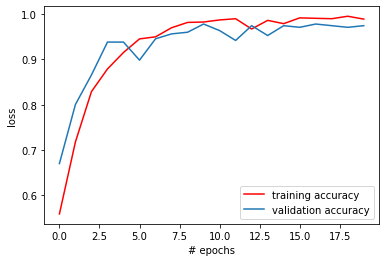

In [5]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()